# Edit Distance

In [1]:
from pylab import *

In [7]:
a = "the quick brown fox jumps over the lazy dogs"
b = "the quack brine foxes jump over the lazy dog"

We start off by allocating an array of distances and sources.
We keep track in these of the search.

In [8]:
n,m = len(a),len(b)

In [15]:
sources = empty((m+1,n+1),object)

In [16]:
dists = 99999*ones((m+1,n+1))

We start off by initializing the costs at time 0 to the number of
initial characters that would be skipped.

In [17]:
dists[0,:] = arange(n+1)

The important step is forwarding from one column to the next.

In [39]:
def step(previous,current):
    for j in range(1,n+1):
        if previous[j]+1<current[j]:
            sources[i,j] = (i-1,j)
            dists[i,j] = previous[j]+1
        if current[j-1]+1<current[j]:
            sources[i,j] = (i,j-1)
            dists[i,j] = current[j-1]+1
        delta = 1*(a[j-1]!=b[i-1])
        if previous[j-1]+delta<current[j]:
            sources[i,j] = (i-1,j-1)
            dists[i,j] = previous[j-1]+delta

We now repeat propagation of the values for each time step.

In [40]:
for i in range(1,m+1):
    previous = dists[i-1,:]
    current = dists[i,:]
    current[0] = i
    step(previous,current)

The distance array now contains all the shortest paths from start to each point.

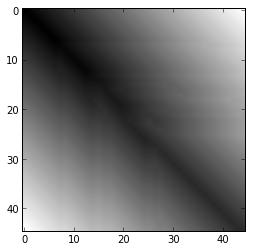

In [41]:
imshow(dists,cmap=cm.gray)

# Tracing Back the Path

In [35]:
l = sources[i,n]
path = []
while l is not None:
    path.append(l)
    i,j = l
    l = sources[i,j]
path = [(n+2,m+2)]+path

In [36]:
path[:5]

[(46, 46), (44, 43), (43, 42), (42, 41), (41, 40)]

# Summarizing the Edits

In [38]:
al,bl = [],[]
for k in range(len(path)-1):
    i,j = path[k]
    i0,j0 = path[k+1]
    u = "_"
    v = "_"
    if j!=j0 and j0<n: u = a[j0]
    if i!=i0 and i0<m: v = b[i0]
    al.append(u)
    bl.append(v)
al = "".join(al[::-1])
bl = "".join(bl[::-1])
print al
print bl
print "".join(["^" if al[i]!=bl[i] else " " for i in range(len(al))])

the quick brown_ fox__ jumps over the lazy dogs
the quack bri_ne foxes jump_ over the lazy dog_
      ^     ^^ ^    ^^     ^                  ^
